# ex2: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Plotting

data.shape: (100, 3)
data content:
 [[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]] 
...


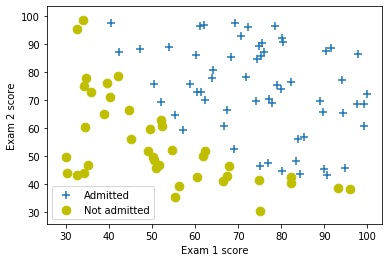

In [2]:
def loadData(file):
    data = np.loadtxt(file, delimiter=',')
    print('data.shape:', data.shape)
    print('data content:\n', data[1:6,:],'\n...')
    m = data.shape[0]
    X = np.c_[data[:,[0,1]]];
    Y = np.c_[data[:,2]];
    return X,Y

def featureStats(X):
    mu = X.mean(axis=0).reshape(1, X.shape[1])
    std = X.std(axis=0).reshape(1, X.shape[1])
    X_scaled = (X - mu) / std
    return mu, std, X_scaled

def featureScaling(X, mu, std):
    Xscaled = (X - mu) / std
    return Xscaled

def plotData(X, Y, labelX=None, labelY=None, labelPos=None, labelNeg=None):

    # =========== code here ============
    pos = (Y[:,0] == 1)
    neg = (Y[:,0] == 0)
    plt.scatter(X[pos][:, 0], X[pos][:, 1], marker='+', s=75)
    plt.scatter(X[neg][:, 0], X[neg][:, 1], c='y', s=75)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.legend([labelPos,labelNeg])
    # ==================================


X, Y = loadData('ex2/ex2data1.txt')
plotData(X, Y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.show()

## Part 2: Compute Cost and Gradient

In [3]:
def sigmoid(z):

    # =========== code here ============
    return (1 / (1 + np.exp(-z)))
    # ==================================

def costFunction(theta, X, Y):
    m = X.shape[0]
    J = 0
    grad = np.zeros(m)

    # =========== code here ============
    h = sigmoid(np.dot(X, theta))
    J = -1 / m * (np.dot(Y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h)))
    grad = 1 / m * np.dot(X.T, h - Y)
    # ==================================

    return J.squeeze(), grad

def gradientDescent(X, Y, theta, alpha=0.0001, num_iterations=400):
    m = X.shape[0]
    J_history = np.zeros(num_iterations)
    
    for iter in np.arange(num_iterations):
        # print('theta=',theta,'\n')
        J, grad = costFunction(theta, X, Y)
        # print('grad=',grad,'\n')
        theta = theta - alpha * grad
        J_history[iter] = J

    return theta, J_history

In [4]:
m = X.shape[0]
mu, std, Xscaled = featureStats(X)
Xtrain = np.c_[np.ones(X.shape[0]), Xscaled]
Ytrain = Y

theta = np.zeros((Xtrain.shape[1], 1));
J, grad = costFunction(theta, Xtrain, Y)
print('J = ', J, '\ngrad = ', grad.squeeze())

J =  0.6931471805599453 
grad =  [-0.1        -0.28122914 -0.25098615]


## Part 3: Optimizing using #

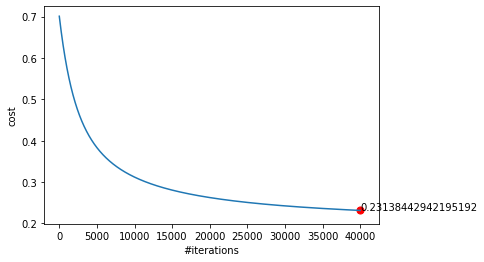

[[0.91837987]
 [2.3108212 ]
 [2.10555915]]


In [5]:
theta = np.random.randn(Xtrain.shape[1]).reshape([Xtrain.shape[1],1]) / np.sqrt(m)
alpha = 0.001
num_iterations = 40000
theta, J_his = gradientDescent(Xtrain, Ytrain, theta, alpha, num_iterations)

iters = range(num_iterations)
plt.plot(iters, J_his)
plt.scatter(iters[-1], J_his[-1], s=50,c='red')
plt.text(iters[-1], J_his[-1], J_his[-1])
plt.xlabel('#iterations')
plt.ylabel('cost')
plt.show()

print(theta)

## Part 4: Predict and Accuracies

In [6]:
def predict(theta, X, mu, std, threshold=0.5):
    Xscaled = featureScaling(X, mu, std)
    X = np.c_[np.ones(X.shape[0]), Xscaled]
    p = sigmoid(np.dot(X, theta)) >= threshold
    return p.astype('int')

p = predict(theta, X, mu, std)
print('Train accuracy {}%'.format(100 * sum(p == Y) / Y.shape[0]))

Train accuracy [90.]%


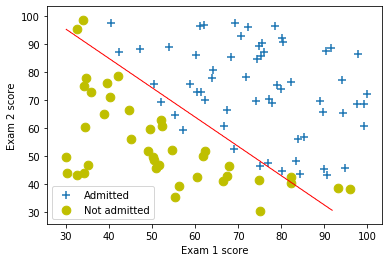

In [7]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

p = predict(theta, np.c_[xx1.ravel(), xx2.ravel()], mu, std)
p = p.reshape(xx1.shape)

plotData(X, Y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.contour(xx1, xx2, p, [0.5], linewidths=1, colors='r')
plt.show()

# Regularization

## Part 1: Regularized logistic Regression

data.shape: (118, 3)
data content:
 [[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]] 
...


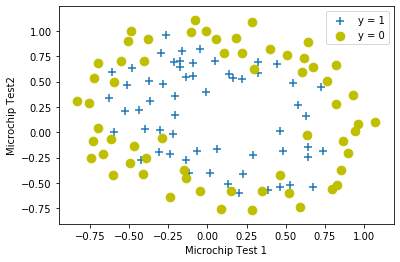

In [8]:
X, Y = loadData('ex2/ex2data2.txt')
plotData(X, Y, 'Microchip Test 1', 'Microchip Test2', 'y = 1', 'y = 0')
plt.show()

### map features to polynomials

In [9]:
def mapFeatures(X1, X2, degree=6):
    # 不包括X1,X2都是零阶的情况
    m = X1.shape[0]
    X = np.zeros((m, int((degree + 1) * (degree + 2) / 2 - 1)))
    n = 0
    for i in np.arange(1, degree + 1):
        for j in np.arange(0, i + 1):
            res = np.multiply(np.power(X1, i - j), np.power(X2, j))
            X[:,n] = res.reshape((m))
            n += 1
    return X

In [10]:
mapFeatures(np.array([[1],[2],[3]]), np.array([[4],[5],[6]])).shape

(3, 27)

### Regularized cost function

In [11]:
def costFunctionReg(theta, X, Y, lamb):
    m = X.shape[0]
    J = 0
    grad = np.zeros(m)

    # =========== code here ============
    h = sigmoid(np.dot(X, theta))
    J = -1 / m * (np.dot(Y.T, np.log(h)) + np.dot((1 - Y).T, np.log(1 - h)))
    J = J + lamb / (2 * m) * np.sum(np.square(theta[1:]))

    grad = 1 / m * np.dot(X.T, h - Y) + (lamb / m) * theta
    grad[0] = grad[0] - lamb / m * theta[0]
    # ==================================

    return J.squeeze(), grad

def gradientDescent(X, Y, theta, lamb=0.5, alpha=0.0001, num_iterations=400):
    m = X.shape[0]
    J_history = np.zeros(num_iterations)
    
    for iter in np.arange(num_iterations):
        # print('theta=',theta,'\n')
        J, grad = costFunctionReg(theta, X, Y, lamb)
        # print('grad=',grad,'\n')
        theta = theta - alpha * grad
        J_history[iter] = J

    return theta, J_history

In [12]:
X, Y = loadData('ex2/ex2data2.txt')
degree = 10
X = mapFeatures(X[:,0],X[:,1], degree)

m = X.shape[0]
mu, std, Xscaled = featureStats(X)
Xtrain = np.c_[np.ones(X.shape[0]), Xscaled]
Ytrain = Y

theta = np.zeros((Xtrain.shape[1], 1));
J, grad = costFunction(theta, Xtrain, Y)
# print('J = ', J, '\ngrad = ', grad.squeeze())

data.shape: (118, 3)
data content:
 [[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]] 
...


## Part 2: Regularization and Accuracies

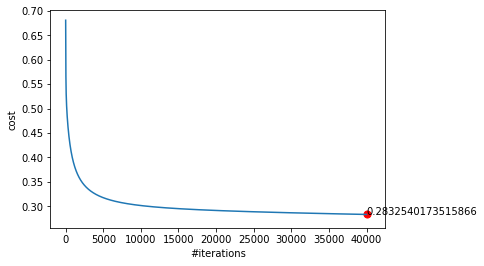

In [13]:
theta = np.random.randn(Xtrain.shape[1]).reshape([Xtrain.shape[1],1]) / np.sqrt(m)
alpha = 0.01
num_iterations = 40000
lamb = 0
theta, J_his = gradientDescent(Xtrain, Ytrain, theta, lamb, alpha, num_iterations)

iters = range(num_iterations)
plt.plot(iters, J_his)
plt.scatter(iters[-1], J_his[-1], s=50,c='red')
plt.text(iters[-1], J_his[-1], J_his[-1])
plt.xlabel('#iterations')
plt.ylabel('cost')
plt.show()

In [14]:
def predict(theta, X, mu, std, threshold=0.5, degree=10):
    X = mapFeatures(X[:,0],X[:,1], degree)
    Xscaled = featureScaling(X, mu, std)
    X = np.c_[np.ones(X.shape[0]), Xscaled]
    p = sigmoid(np.dot(X, theta)) >= threshold
    return p.astype('int')

p = predict(theta, X, mu, std)
print('Train accuracy {}%'.format(100 * sum(p == Y) / Y.shape[0]))

Train accuracy [88.13559322]%


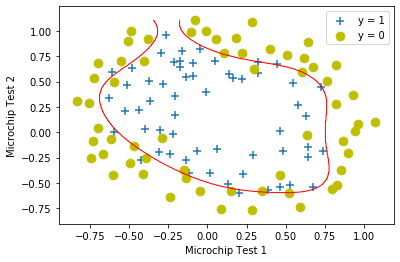

In [15]:
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

p = predict(theta, np.c_[xx1.ravel(), xx2.ravel()], mu, std)
p = p.reshape(xx1.shape)
plotData(X, Y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plt.contour(xx1, xx2, p, [0.5], linewidths=1, colors='r')
plt.show()